In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset

dataset = pd.read_csv('E:/datafiles/Churn_Modelling.csv')

X = dataset.iloc[:, 3:13]  #independent column
y = dataset.iloc[:, 13]    #dependent column

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [5]:
print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [6]:
#Create dummy variables

#In our dataset the 'Geography', 'Gender' are categorical features so convert them into dummy variable/features
#To transform categorical data into nomial data like 0,1,2 because machine can only understands numerical data.

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [8]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [9]:
# Concatenate the Data Frames with X data set

X=pd.concat([X,geography,gender],axis=1)

In [10]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0          1               1        101348.88        0      0     0  
1          0               1        112542.58        0      1     0  
2          1               0        113931.57        0      0     0  
3          0               0         93826.63        0      0     0  
4          1               1         79084.10        0      1     0  


In [11]:
#Drop Unnecessary columns

X=X.drop(['Geography','Gender'],axis=1)


In [12]:
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0  


In [13]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling

#Feature Scaling is done on all columns to make same magnitude of all columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
#Perform Hyper Parameter Optimization

#To perform any operation on ANN in sequentional order then import models(Sequential) from keras
#If we want to create any hidden layer then we have to import Dense layer from keras

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [18]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,PReLU,ELU,BatchNormalization
from keras.activations import relu,sigmoid

In [19]:
#Creating a function with parameters(layers,activation)

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv =5)

In [20]:
grid_result = grid.fit(X_train, y_train)

In [21]:
#Model best results

print(grid_result.best_score_,grid_result.best_params_)

0.8462499976158142 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (45, 30, 15)}


In [22]:
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [23]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1529,   66],
       [ 214,  191]], dtype=int64)

Text(69.0, 0.5, 'Truth')

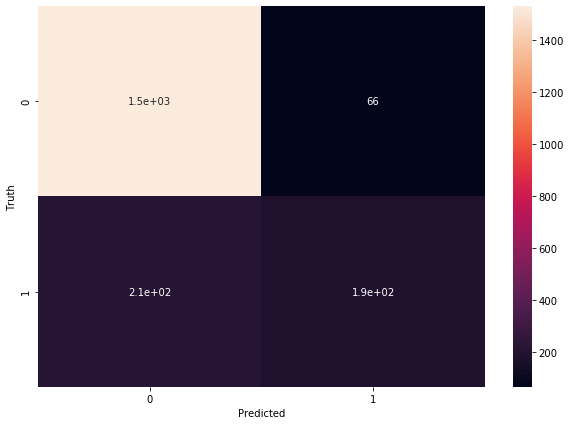

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [26]:
score

0.86